### Linear Regression from Scratch

Here we will demonstrate a from-scratch implimentation of linear regression

In [1]:
# Packages
# Numpy for matrix algebra, pandas for data formatting, and pyplot for fitting

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Hyperparameters
learning_rate = 1e-5
max_iters = 100000
tol = 1

The learning rate is the coefficient of the gradient in gradient descent.

max_iters is the maximum number of steps in the optimization

tol sets the convergence criteria

In [3]:
class LinearRegression:
    """
    This class performs OLS linear regression
    """

    def __init__(self):
        """
        Constructor
        Sets self.trained to zero
        """
        self.trained = False
        self.B = None
    
    def rss(self, X, y):
        """
        Calculate residual sum of squares as cost function
        :param X: (array) Feature matrix
        :param y: (vector) targets
        """
        value = (y - (self.B @ X.T))   
        value = np.multiply(value, value)
        return np.sum(value)

    def predict(self, X):
        """
        Estimate values! 
        :param X: (array) Feature matrix
        """
        try: 
            y_est = self.B @ X.T
            return y_est
        except ValueError: print("Error - model has not been trained")

    def r_squared(self, X, y):
        """
        Calculates the coefficient of determination
        :param X: (array) Feature matrix
        :param y: (vector) Targets
        :return: (float) coefficient of determination
        """
        return 1 - self.rss(X, y) / np.sum((y - np.mean(y))**2)

    def grss(self, X, y):
        """
        Calculate the gradient of the cost function (analytically)
        :param X: (array) Feature matrix
        :param y: (vector) Targets
        """
        
        # d/dB (y-BX)**2 = 2 (y-BX)X
        return 2 * X.T @ (y - (self.B @ X.T)).T
        
    def fit(self, X, y, max_iters=10000, tol=1e-3, learning_rate=1e-5):
        """
        Fits a regression of y onto X
        :param X: (array) Feature matrix
        :param y: (vector) targets 
        :param max_iters: (int) Maximum iterations, default 1E5
        :param tol: (float) Tolerance for convergence
        :param learning_rate: (float) Learning rate, default 1E-5
        """
        
        # Initialize coefficients, cost, and iterations 
        self.B = np.zeros((np.shape(X)[1]))
        cost = self.rss(X, y)
        convergence = np.zeros(max_iters+1)
        convergence[0] = cost
        i = 0
        
        for i in range(max_iters):
            previous_cost = cost
            dRSS = self.grss(X, y)
            self.B = self.B + dRSS / (np.mean(X, axis=0)) * learning_rate
            cost = self.rss(X, y)
            convergence[i] = cost

            print("Cost: %.2f" % cost, end='\r')

            if abs(previous_cost - cost) < tol:
                self.trained = True
                return self.B,convergence[0:i]

            if cost > previous_cost * 200:
                print("\n Diverging!")
                return self.B,convergence[0:i]
        
        # If we reach here, the regression has neither converged nor diverged in the maximum number of iterations
        print("\n Max Iters Reached")
        return self.B,convergence[0:i]


We load the advertising data and have a look...

In [4]:
data = pd.read_csv("Advertising.csv")
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


We have three predictors and a target. We make our feature matrix a column of ones (for the intercept term to simplify the matrix algebra) and the 'TV,' 'Radio,' and 'Newspaper' fields, and we make our target vector the 'Sales' field.

In [5]:
y = data['Sales']
X = np.hstack((np.ones((len(y), 1)), data[['TV', 'Radio', 'Newspaper']].values))

We initialize our model and fit it

In [6]:
LLS = LinearRegression()
B, convergence = LLS.fit(X, y, max_iters=max_iters, tol=1E-3, learning_rate=learning_rate)



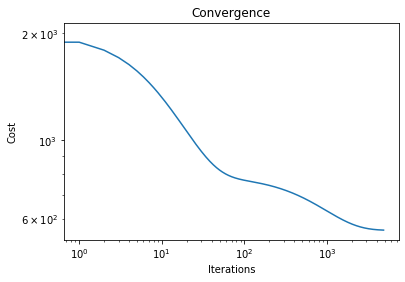

In [7]:
plt.loglog(convergence)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Convergence")
plt.show()

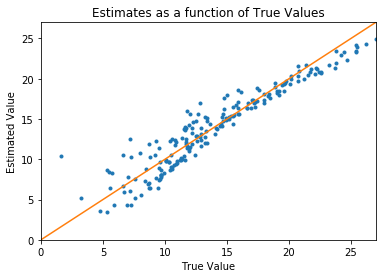

In [8]:
plt.plot(y,  LLS.predict(X), '.')
plt.plot((0,max(y)), (0, max(y)))
plt.xlabel('True Value')
plt.ylabel('Estimated Value')
plt.xlim((0, max(y)))
plt.ylim((0, max(y)))
plt.title("Estimates as a function of True Values")
plt.show()

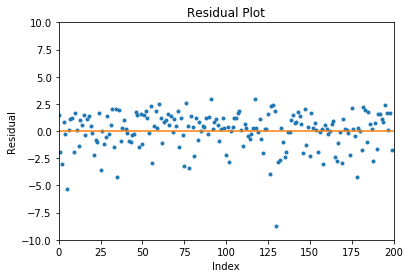

In [9]:
plt.plot((y-LLS.predict(X))**1, '.')
plt.plot((0, 200), (0, 0))
plt.xlabel('Index')
plt.ylabel('Residual')
plt.ylim((-10, 10))
plt.xlim((0, len(y)))
plt.title('Residual Plot')
plt.show()

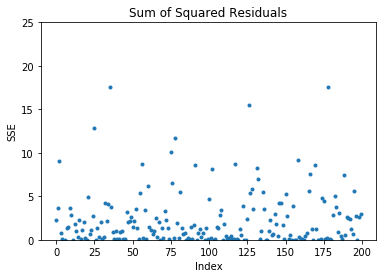

In [10]:
plt.plot((y-LLS.predict(X))**2, '.')
plt.xlabel('Index')
plt.ylabel('SSE')
plt.ylim((0, 25))
plt.title('Sum of Squared Residuals')
plt.show()

Our model appears to work well! 